In [ ]:
import matplotlib as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Read from Pickle

In [ ]:
df = pd.read_pickle('df_cleaned.pkl')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int8    
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    string  
 10  adult_male   891 non-null    category
 11  deck         203 non-null    category
 12  embark_town  889 non-null    string  
 13  alone        891 non-null    category
dtypes: category(5), float64(2), int64(4), int8(1), string(2)
memory usage: 61.8 KB


### Conbnverting 'Object' features

In [ ]:
df['deck'] = df['deck'].astype('string')
df['embarked'] = df['embarked'].astype('string')
df['embark_town'] = df['embark_town'].astype('string')

df['fare']=df['fare'].astype(float)
df['age']=df['age'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int8    
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    string  
 8   class        891 non-null    category
 9   who          891 non-null    string  
 10  adult_male   891 non-null    category
 11  deck         203 non-null    string  
 12  embark_town  889 non-null    string  
 13  alone        891 non-null    category
dtypes: category(3), float64(2), int64(4), int8(1), string(4)
memory usage: 73.5 KB


We can see age, fare and embarked and Deck

# Missing Matrics

<Axes: >

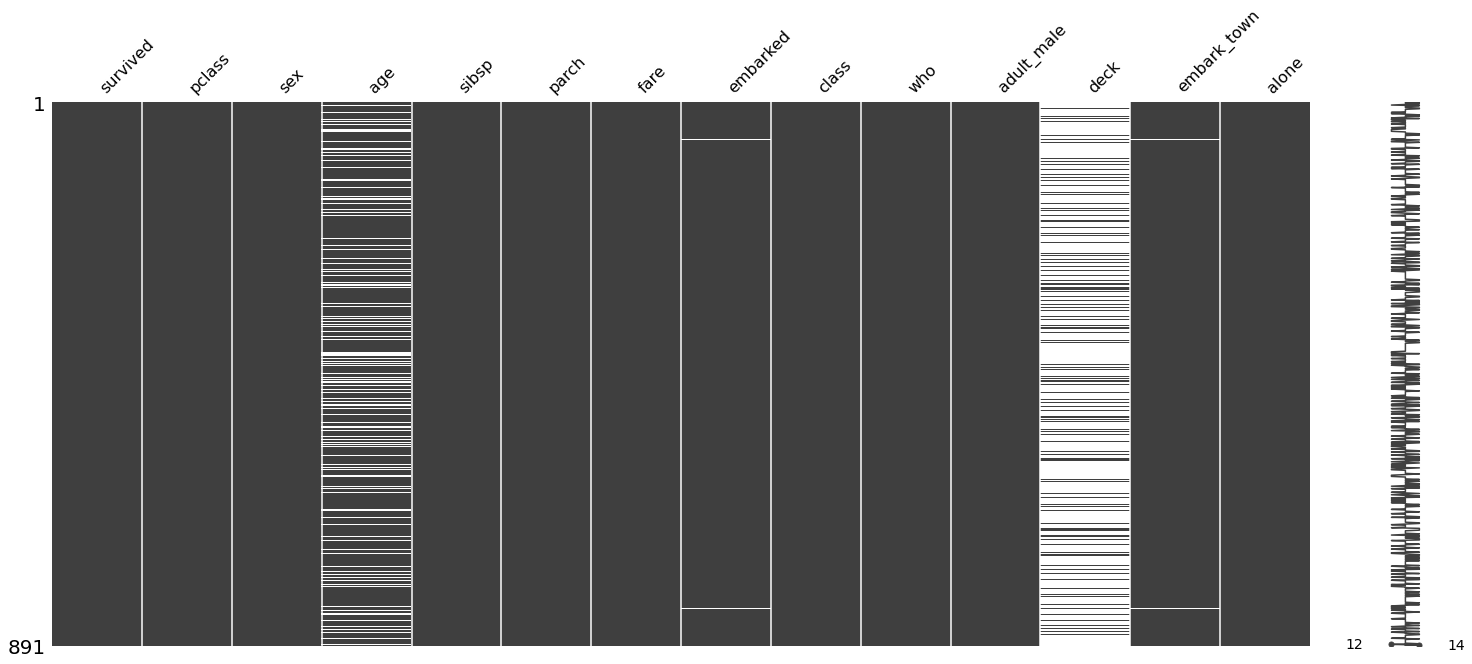

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:

# Calculate number of missing values and percentage of missing values
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a DataFrame and filter columns with missing values without considering variance
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Display only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Display the summary
missing_summary

,Missing Values,Percentage
age,177,19.865320
embarked,2,0.224467
deck,688,77.216611
embark_town,2,0.224467


In [ ]:
#77% missing values
del df['deck']

### embark_town

In [ ]:
df['embarked'].value_counts()
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: Int64

The missing values on embark_town and embarked are same.<br> and they're indentical so we can remove one and we will maintain the rows by filling with 'Unknown'

In [ ]:
rows_with_missing_embarked = df[df['embarked'].isnull()]
rows_with_missing_embarked

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
61,1,1,0,38.0,0,0,80.0,<NA>,First,woman,False,<NA>,True
829,1,1,0,0.0,0,0,80.0,<NA>,First,woman,False,<NA>,True


In [ ]:
df['embark_town'] = df['embark_town'].fillna('Unknown')
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Unknown          2
Name: count, dtype: Int64

In [ ]:
del df['embarked']

### age

In [ ]:
#df['age'].value_counts()

Filling the fare with random within the range

In [ ]:
# Assuming 'df' is your DataFrame
# Define the range of ages
age_min = df['age'].min()
age_max = df['age'].max()

# Generate random ages within the range and fill missing values
df['age'] = df['age'].apply(lambda x: np.random.uniform(age_min, age_max) if pd.isnull(x) else x)

df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,1,22.000000,1,0,7.2500,Third,man,True,Southampton,False
1,1,1,0,38.000000,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,3,0,26.000000,0,0,7.9250,Third,woman,False,Southampton,True
3,1,1,0,35.000000,1,0,53.1000,First,woman,False,Southampton,False
4,0,3,1,35.000000,0,0,8.0500,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,Second,man,True,Southampton,True
887,1,1,0,19.000000,0,0,30.0000,First,woman,False,Southampton,True
888,0,3,0,44.833146,1,2,23.4500,Third,woman,False,Southampton,False
889,1,1,1,26.000000,0,0,30.0000,First,man,True,Cherbourg,True


### fare

Filling the fare with random, considering distribution

In [ ]:
# Assuming 'df' is your DataFrame
# Calculate the mean and standard deviation of the 'fare' column
fare_mean = df['fare'].mean()
fare_std = df['fare'].std()

# Generate random fare values based on the normal distribution and fill missing values considering variance
df['fare'] = df['fare'].apply(lambda x: np.random.normal(fare_mean, fare_std) if pd.isnull(x) else x)

# Display the DataFrame to verify the changes
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,1,0,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,1,0,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,3,1,35.0,0,0,8.0500,Third,man,True,Southampton,True


<Axes: >

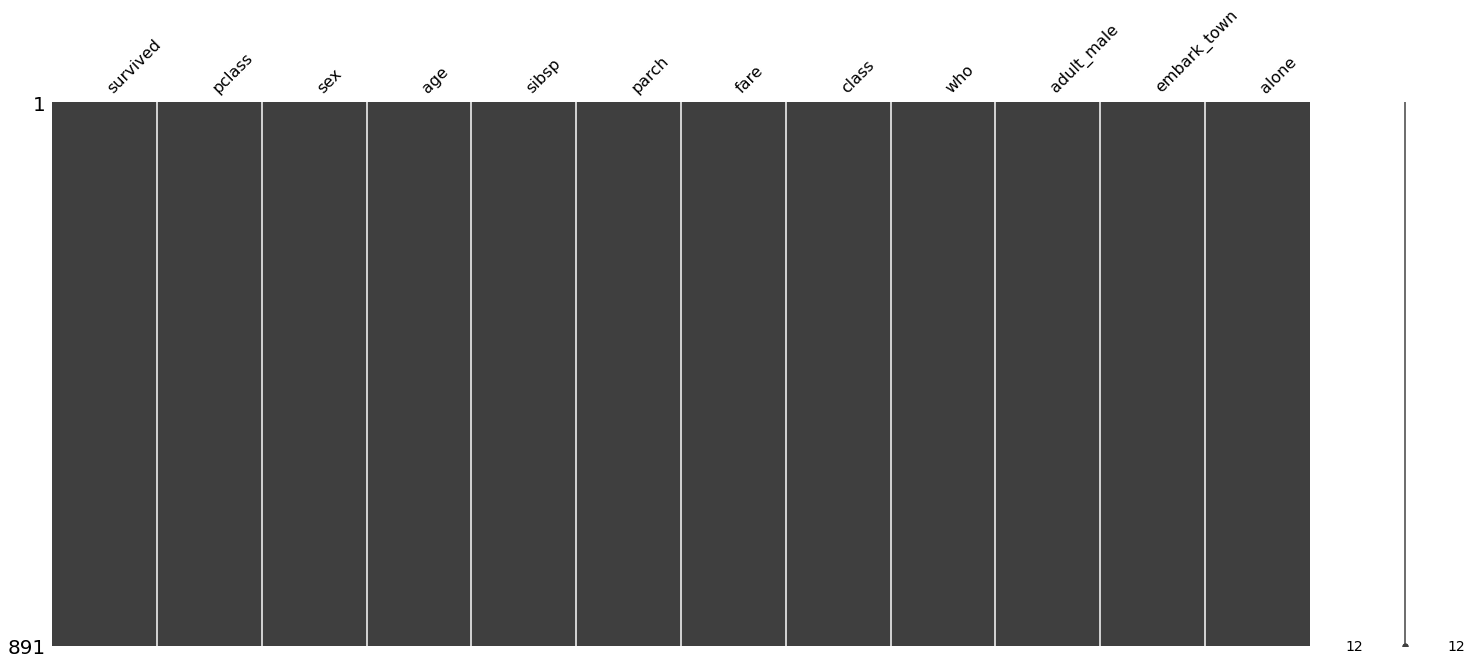

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

# Lovely